In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "./"
SPECTPATH = Path("../data/PPMISPECT/")

In [5]:
import pydicom
import glob
import os
import numpy

In [6]:
lstFilesDCM = []  # create an empty list
'''for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))'''

'for dirName, subdirList, fileList in os.walk(PathDicom):\n    for filename in fileList:\n        if ".dcm" in filename.lower():  # check whether the file\'s DICOM\n            lstFilesDCM.append(os.path.join(dirName,filename))'

In [7]:
metadata = pd.read_csv(f'{PATH}PPMI.csv')

In [8]:
metadata[0:5]

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,388628,4140,Control,M,76,0,SPECT,Reconstructed DaTSCAN,Processed,4/09/2013,DCM,5/27/2018
1,388627,4139,Control,M,81,0,SPECT,Reconstructed DaTSCAN,Processed,3/19/2013,DCM,5/27/2018
2,388626,4137,PD,M,70,0,SPECT,Reconstructed DaTSCAN,Processed,4/02/2013,DCM,5/27/2018
3,388625,4136,PD,M,56,0,SPECT,Reconstructed DaTSCAN,Processed,2/13/2013,DCM,5/27/2018
4,451290,4135,PD,M,68,5,SPECT,Reconstructed DaTSCAN,Processed,2/18/2014,DCM,5/27/2018


In [9]:
#Shuffle data
metadata = metadata.sample(frac=1).reset_index(drop=True)

In [10]:
metadata[0:5]

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,449440,3502,PD,M,73,90,SPECT,Reconstructed DaTSCAN,Processed,11/06/2013,DCM,5/27/2018
1,449038,4025,PD,F,51,7,SPECT,Reconstructed DaTSCAN,Processed,8/05/2014,DCM,5/27/2018
2,355949,3454,PD,F,58,5,SPECT,Reconstructed DaTSCAN,Processed,2/01/2012,DCM,5/27/2018
3,388500,3332,PD,M,74,0,SPECT,Reconstructed DaTSCAN,Processed,3/27/2013,DCM,5/27/2018
4,342180,3175,PD,F,57,0,SPECT,Reconstructed DaTSCAN,Processed,4/13/2012,DCM,5/27/2018


In [11]:
for file in glob.glob(f'{PATH}PPMI*/**/Reconstructed_DaTSCAN/**/**/*.dcm'):
    lstFilesDCM.append(file)

In [12]:
len(lstFilesDCM)

1569

In [13]:
ptID = []
for i in lstFilesDCM:
    j = i.split("_")[13].strip()
    j = int(j[1:7])
    ptID.append(j)
len(ptID)

1569

In [14]:
p ={}
for o in ptID:
    for k in metadata.iloc[:,0]:
        if o == k:
            p[o] = metadata.loc[metadata['Image Data ID'] == k, 'Group'].tolist()[0]
len(p)

1569

In [15]:
df = metadata[['Image Data ID','Group']].set_index('Image Data ID')
for index, rows in df.iterrows():
    for i in lstFilesDCM:
        j = i.split("_")[13].strip()
        j = int(j[1:7])
        if index == j:
            df.loc[df.index == j, "Filenames"] = i


In [163]:
#Check duplicate item
bg = []
for i in lstFilesDCM:
    for index, rows in df.iterrows():
        j = i.split("_")[13].strip()
        j = int(j[1:7])
        if j == index:
            bg.append(index)
print( [item for item, count in collections.Counter(bg).items() if count > 1] )
            

In [10]:
df.loc[df.index == 340366]

,Group,Filenames
Image Data ID,,
340366,Control,../../Downloads/PPMISPECT/PPMI 4/3428/Reconstr...


In [24]:
y = np.asarray(pd.factorize(df['Group']))[0]
#For multiple image
y_append = np.append(y,(y,y,y,y,y))

In [25]:
len(y_append)

9438

ValueError: Found input variables with inconsistent numbers of samples: [1573, 9438]

In [16]:
lstFilesDCM = df['Filenames'].values

In [17]:
lstFilesDCM = lstFilesDCM.tolist()

In [18]:
df.sample(frac=0.2, axis=0)

,Group,Filenames
Image Data ID,,
341236,Control,./PPMI 5/3355/Reconstructed_DaTSCAN/2011-06-29...
338804,PD,./PPMI 9/3618/Reconstructed_DaTSCAN/2011-09-22...
436085,PD,./PPMI 3/4038/Reconstructed_DaTSCAN/2014-04-30...
688497,PD,./PPMI 7/3654/Reconstructed_DaTSCAN/2015-05-01...
495317,PD,./PPMI 8/3792/Reconstructed_DaTSCAN/2015-02-25...
419592,PD,./PPMI 3.5/3957/Reconstructed_DaTSCAN/2013-09-...
342171,PD,./PPMI 5/3020/Reconstructed_DaTSCAN/2012-03-27...
389270,PD,./PPMI 2/4019/Reconstructed_DaTSCAN/2012-02-08...
339541,Control,./PPMI 8/3523/Reconstructed_DaTSCAN/2011-12-06...


In [19]:
up3 = pd.read_csv('combine.csv')

In [20]:
up3_df = up3[['Image Data ID','TOTAL']].set_index('Image Data ID')

In [21]:
df = df.join(up3_df)

In [22]:
df = df.dropna()

In [25]:
df

,Group,Filenames,TOTAL
Image Data ID,,,
449038,PD,./PPMI 3/4025/Reconstructed_DaTSCAN/2014-08-05...,19.0
355949,PD,./PPMI 8/3454/Reconstructed_DaTSCAN/2012-02-01...,18.0
388500,PD,./PPMI 3/3332/Reconstructed_DaTSCAN/2013-03-27...,15.0
342180,PD,./PPMI 3.5/3175/Reconstructed_DaTSCAN/2012-04-...,17.0
418495,PD,./PPMI 3/3603/Reconstructed_DaTSCAN/2012-10-16...,22.0
468268,PD,./PPMI 2/3325/Reconstructed_DaTSCAN/2014-08-28...,16.0
343882,PD,./PPMI 5/4056/Reconstructed_DaTSCAN/2012-06-21...,17.0
504443,PD,./PPMI 3/3777/Reconstructed_DaTSCAN/2014-06-18...,29.0
341253,PD,./PPMI 7/3771/Reconstructed_DaTSCAN/2012-01-25...,26.0


In [27]:
lstFilesDCM = df['Filenames'].values
lstFilesDCM = lstFilesDCM.tolist()

In [ ]:
from sklearn.model_selection import train_test_split
X_train_tmp, X_test_tmp, y_train_tmp, y_test_tmp = train_test_split(df, df['Group'], test_size=0.2)

from sklearn.model_selection import train_test_split
X_train_tmp, X_val_tmp, y_train_tmp, y_val_tmp = train_test_split(X_train_tmp, y_train_tmp, test_size=0.3)

In [ ]:
lstFilesDCM_train = []  # create an empty list
lstFilesDCM_test = []
lstFilesDCM_val = []
lstFilesDCM_train = X_train_tmp['Filenames'].values
lstFilesDCM_train = lstFilesDCM_train.tolist()
lstFilesDCM_test = X_test_tmp['Filenames'].values
lstFilesDCM_test = lstFilesDCM_test.tolist()
lstFilesDCM_val = X_val_tmp['Filenames'].values
lstFilesDCM_val = lstFilesDCM_val.tolist()

#### Handpick slide number 39-41 those represent brightest

In [18]:
# loop through all the DICOM files
image_array_39 =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_train:
    print(lstFilesDCM.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_39.append(ds.pixel_array[39])
    #For debug corrupted image
    print(np.asarray(image_array_39).shape)

0
(1, 109, 91)
1
(2, 109, 91)
2
(3, 109, 91)
3
(4, 109, 91)
4
(5, 109, 91)
5
(6, 109, 91)
6
(7, 109, 91)
7
(8, 109, 91)
8
(9, 109, 91)
9
(10, 109, 91)
10
(11, 109, 91)
11
(12, 109, 91)
12
(13, 109, 91)
13
(14, 109, 91)
14
(15, 109, 91)
15
(16, 109, 91)
16
(17, 109, 91)
17
(18, 109, 91)
18
(19, 109, 91)
19
(20, 109, 91)
20
(21, 109, 91)
21
(22, 109, 91)
22
(23, 109, 91)
23
(24, 109, 91)
24
(25, 109, 91)
25
(26, 109, 91)
26
(27, 109, 91)
27
(28, 109, 91)
28
(29, 109, 91)
29
(30, 109, 91)
30
(31, 109, 91)
31
(32, 109, 91)
32
(33, 109, 91)
33
(34, 109, 91)
34
(35, 109, 91)
35
(36, 109, 91)
36
(37, 109, 91)
37
(38, 109, 91)
38
(39, 109, 91)
39
(40, 109, 91)
40
(41, 109, 91)
41
(42, 109, 91)
42
(43, 109, 91)
43
(44, 109, 91)
44
(45, 109, 91)
45
(46, 109, 91)
46
(47, 109, 91)
47
(48, 109, 91)
48
(49, 109, 91)
49
(50, 109, 91)
50
(51, 109, 91)
51
(52, 109, 91)
52
(53, 109, 91)
53
(54, 109, 91)
54
(55, 109, 91)
55
(56, 109, 91)
56
(57, 109, 91)
57
(58, 109, 91)
58
(59, 109, 91)
59
(60, 109, 91)

(452, 109, 91)
452
(453, 109, 91)
453
(454, 109, 91)
454
(455, 109, 91)
455
(456, 109, 91)
456
(457, 109, 91)
457
(458, 109, 91)
458
(459, 109, 91)
459
(460, 109, 91)
460
(461, 109, 91)
461
(462, 109, 91)
462
(463, 109, 91)
463
(464, 109, 91)
464
(465, 109, 91)
465
(466, 109, 91)
466
(467, 109, 91)
467
(468, 109, 91)
468
(469, 109, 91)
469
(470, 109, 91)
470
(471, 109, 91)
471
(472, 109, 91)
472
(473, 109, 91)
473
(474, 109, 91)
474
(475, 109, 91)
475
(476, 109, 91)
476
(477, 109, 91)
477
(478, 109, 91)
478
(479, 109, 91)
479
(480, 109, 91)
480
(481, 109, 91)
481
(482, 109, 91)
482
(483, 109, 91)
483
(484, 109, 91)
484
(485, 109, 91)
485
(486, 109, 91)
486
(487, 109, 91)
487
(488, 109, 91)
488
(489, 109, 91)
489
(490, 109, 91)
490
(491, 109, 91)
491
(492, 109, 91)
492
(493, 109, 91)
493
(494, 109, 91)
494
(495, 109, 91)
495
(496, 109, 91)
496
(497, 109, 91)
497
(498, 109, 91)
498
(499, 109, 91)
499
(500, 109, 91)
500
(501, 109, 91)
501
(502, 109, 91)
502
(503, 109, 91)
503
(504, 109, 9

(888, 109, 91)
888
(889, 109, 91)
889
(890, 109, 91)
890
(891, 109, 91)
891
(892, 109, 91)
892
(893, 109, 91)
893
(894, 109, 91)
894
(895, 109, 91)
895
(896, 109, 91)
896
(897, 109, 91)
897
(898, 109, 91)
898
(899, 109, 91)
899
(900, 109, 91)
900
(901, 109, 91)
901
(902, 109, 91)
902
(903, 109, 91)
903
(904, 109, 91)
904
(905, 109, 91)
905
(906, 109, 91)
906
(907, 109, 91)
907
(908, 109, 91)
908
(909, 109, 91)
909
(910, 109, 91)
910
(911, 109, 91)
911
(912, 109, 91)
912
(913, 109, 91)
913
(914, 109, 91)
914
(915, 109, 91)
915
(916, 109, 91)
916
(917, 109, 91)
917
(918, 109, 91)
918
(919, 109, 91)
919
(920, 109, 91)
920
(921, 109, 91)
921
(922, 109, 91)
922
(923, 109, 91)
923
(924, 109, 91)
924
(925, 109, 91)
925
(926, 109, 91)
926
(927, 109, 91)
927
(928, 109, 91)
928
(929, 109, 91)
929
(930, 109, 91)
930
(931, 109, 91)
931
(932, 109, 91)
932
(933, 109, 91)
933
(934, 109, 91)
934
(935, 109, 91)
935
(936, 109, 91)
936
(937, 109, 91)
937
(938, 109, 91)
938
(939, 109, 91)
939
(940, 109, 9

(1295, 109, 91)
1295
(1296, 109, 91)
1296
(1297, 109, 91)
1297
(1298, 109, 91)
1298
(1299, 109, 91)
1299
(1300, 109, 91)
1300
(1301, 109, 91)
1301
(1302, 109, 91)
1302
(1303, 109, 91)
1303
(1304, 109, 91)
1304
(1305, 109, 91)
1305
(1306, 109, 91)
1306
(1307, 109, 91)
1307
(1308, 109, 91)
1308
(1309, 109, 91)
1309
(1310, 109, 91)
1310
(1311, 109, 91)
1311
(1312, 109, 91)
1312
(1313, 109, 91)
1313
(1314, 109, 91)
1314
(1315, 109, 91)
1315
(1316, 109, 91)
1316
(1317, 109, 91)
1317
(1318, 109, 91)
1318
(1319, 109, 91)
1319
(1320, 109, 91)
1320
(1321, 109, 91)
1321
(1322, 109, 91)
1322
(1323, 109, 91)
1323
(1324, 109, 91)
1324
(1325, 109, 91)
1325
(1326, 109, 91)
1326
(1327, 109, 91)
1327
(1328, 109, 91)
1328
(1329, 109, 91)
1329
(1330, 109, 91)
1330
(1331, 109, 91)
1331
(1332, 109, 91)
1332
(1333, 109, 91)
1333
(1334, 109, 91)
1334
(1335, 109, 91)
1335
(1336, 109, 91)
1336
(1337, 109, 91)
1337
(1338, 109, 91)
1338
(1339, 109, 91)
1339
(1340, 109, 91)
1340
(1341, 109, 91)
1341
(1342, 109, 9

In [28]:
# loop through all the DICOM files
image_array_40 =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_train:
    print(lstFilesDCM.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_40.append(ds.pixel_array[40])
    #For debug corrupted image
    print(np.asarray(image_array_40).shape)

0
(1, 109, 91)
1
(2, 109, 91)
2
(3, 109, 91)
3
(4, 109, 91)
4
(5, 109, 91)
5
(6, 109, 91)
6
(7, 109, 91)
7
(8, 109, 91)
8
(9, 109, 91)
9
(10, 109, 91)
10
(11, 109, 91)
11
(12, 109, 91)
12
(13, 109, 91)
13
(14, 109, 91)
14
(15, 109, 91)
15
(16, 109, 91)
16
(17, 109, 91)
17
(18, 109, 91)
18
(19, 109, 91)
19
(20, 109, 91)
20
(21, 109, 91)
21
(22, 109, 91)
22
(23, 109, 91)
23
(24, 109, 91)
24
(25, 109, 91)
25
(26, 109, 91)
26
(27, 109, 91)
27
(28, 109, 91)
28
(29, 109, 91)
29
(30, 109, 91)
30
(31, 109, 91)
31
(32, 109, 91)
32
(33, 109, 91)
33
(34, 109, 91)
34
(35, 109, 91)
35
(36, 109, 91)
36
(37, 109, 91)
37
(38, 109, 91)
38
(39, 109, 91)
39
(40, 109, 91)
40
(41, 109, 91)
41
(42, 109, 91)
42
(43, 109, 91)
43
(44, 109, 91)
44
(45, 109, 91)
45
(46, 109, 91)
46
(47, 109, 91)
47
(48, 109, 91)
48
(49, 109, 91)
49
(50, 109, 91)
50
(51, 109, 91)
51
(52, 109, 91)
52
(53, 109, 91)
53
(54, 109, 91)
54
(55, 109, 91)
55
(56, 109, 91)
56
(57, 109, 91)
57
(58, 109, 91)
58
(59, 109, 91)
59
(60, 109, 91)

(445, 109, 91)
445
(446, 109, 91)
446
(447, 109, 91)
447
(448, 109, 91)
448
(449, 109, 91)
449
(450, 109, 91)
450
(451, 109, 91)
451
(452, 109, 91)
452
(453, 109, 91)
453
(454, 109, 91)
454
(455, 109, 91)
455
(456, 109, 91)
456
(457, 109, 91)
457
(458, 109, 91)
458
(459, 109, 91)
459
(460, 109, 91)
460
(461, 109, 91)
461
(462, 109, 91)
462
(463, 109, 91)
463
(464, 109, 91)
464
(465, 109, 91)
465
(466, 109, 91)
466
(467, 109, 91)
467
(468, 109, 91)
468
(469, 109, 91)
469
(470, 109, 91)
470
(471, 109, 91)
471
(472, 109, 91)
472
(473, 109, 91)
473
(474, 109, 91)
474
(475, 109, 91)
475
(476, 109, 91)
476
(477, 109, 91)
477
(478, 109, 91)
478
(479, 109, 91)
479
(480, 109, 91)
480
(481, 109, 91)
481
(482, 109, 91)
482
(483, 109, 91)
483
(484, 109, 91)
484
(485, 109, 91)
485
(486, 109, 91)
486
(487, 109, 91)
487
(488, 109, 91)
488
(489, 109, 91)
489
(490, 109, 91)
490
(491, 109, 91)
491
(492, 109, 91)
492
(493, 109, 91)
493
(494, 109, 91)
494
(495, 109, 91)
495
(496, 109, 91)
496
(497, 109, 9

(879, 109, 91)
879
(880, 109, 91)
880
(881, 109, 91)
881
(882, 109, 91)
882
(883, 109, 91)
883
(884, 109, 91)
884
(885, 109, 91)
885
(886, 109, 91)
886
(887, 109, 91)
887
(888, 109, 91)
888
(889, 109, 91)
889
(890, 109, 91)
890
(891, 109, 91)
891
(892, 109, 91)
892
(893, 109, 91)
893
(894, 109, 91)
894
(895, 109, 91)
895
(896, 109, 91)
896
(897, 109, 91)
897
(898, 109, 91)
898
(899, 109, 91)
899
(900, 109, 91)
900
(901, 109, 91)
901
(902, 109, 91)
902
(903, 109, 91)
903
(904, 109, 91)
904
(905, 109, 91)
905
(906, 109, 91)
906
(907, 109, 91)
907
(908, 109, 91)
908
(909, 109, 91)
909
(910, 109, 91)
910
(911, 109, 91)
911
(912, 109, 91)
912
(913, 109, 91)
913
(914, 109, 91)
914
(915, 109, 91)
915
(916, 109, 91)
916
(917, 109, 91)
917
(918, 109, 91)
918
(919, 109, 91)
919
(920, 109, 91)
920
(921, 109, 91)
921
(922, 109, 91)
922
(923, 109, 91)
923
(924, 109, 91)
924
(925, 109, 91)
925
(926, 109, 91)
926
(927, 109, 91)
927
(928, 109, 91)
928
(929, 109, 91)
929
(930, 109, 91)
930
(931, 109, 9

In [20]:
# loop through all the DICOM files
image_array_41 =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_train:
    print(lstFilesDCM.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_41.append(ds.pixel_array[41])
    #For debug corrupted image
    print(np.asarray(image_array_41).shape)

0
(1, 109, 91)
1
(2, 109, 91)
2
(3, 109, 91)
3
(4, 109, 91)
4
(5, 109, 91)
5
(6, 109, 91)
6
(7, 109, 91)
7
(8, 109, 91)
8
(9, 109, 91)
9
(10, 109, 91)
10
(11, 109, 91)
11
(12, 109, 91)
12
(13, 109, 91)
13
(14, 109, 91)
14
(15, 109, 91)
15
(16, 109, 91)
16
(17, 109, 91)
17
(18, 109, 91)
18
(19, 109, 91)
19
(20, 109, 91)
20
(21, 109, 91)
21
(22, 109, 91)
22
(23, 109, 91)
23
(24, 109, 91)
24
(25, 109, 91)
25
(26, 109, 91)
26
(27, 109, 91)
27
(28, 109, 91)
28
(29, 109, 91)
29
(30, 109, 91)
30
(31, 109, 91)
31
(32, 109, 91)
32
(33, 109, 91)
33
(34, 109, 91)
34
(35, 109, 91)
35
(36, 109, 91)
36
(37, 109, 91)
37
(38, 109, 91)
38
(39, 109, 91)
39
(40, 109, 91)
40
(41, 109, 91)
41
(42, 109, 91)
42
(43, 109, 91)
43
(44, 109, 91)
44
(45, 109, 91)
45
(46, 109, 91)
46
(47, 109, 91)
47
(48, 109, 91)
48
(49, 109, 91)
49
(50, 109, 91)
50
(51, 109, 91)
51
(52, 109, 91)
52
(53, 109, 91)
53
(54, 109, 91)
54
(55, 109, 91)
55
(56, 109, 91)
56
(57, 109, 91)
57
(58, 109, 91)
58
(59, 109, 91)
59
(60, 109, 91)

(455, 109, 91)
455
(456, 109, 91)
456
(457, 109, 91)
457
(458, 109, 91)
458
(459, 109, 91)
459
(460, 109, 91)
460
(461, 109, 91)
461
(462, 109, 91)
462
(463, 109, 91)
463
(464, 109, 91)
464
(465, 109, 91)
465
(466, 109, 91)
466
(467, 109, 91)
467
(468, 109, 91)
468
(469, 109, 91)
469
(470, 109, 91)
470
(471, 109, 91)
471
(472, 109, 91)
472
(473, 109, 91)
473
(474, 109, 91)
474
(475, 109, 91)
475
(476, 109, 91)
476
(477, 109, 91)
477
(478, 109, 91)
478
(479, 109, 91)
479
(480, 109, 91)
480
(481, 109, 91)
481
(482, 109, 91)
482
(483, 109, 91)
483
(484, 109, 91)
484
(485, 109, 91)
485
(486, 109, 91)
486
(487, 109, 91)
487
(488, 109, 91)
488
(489, 109, 91)
489
(490, 109, 91)
490
(491, 109, 91)
491
(492, 109, 91)
492
(493, 109, 91)
493
(494, 109, 91)
494
(495, 109, 91)
495
(496, 109, 91)
496
(497, 109, 91)
497
(498, 109, 91)
498
(499, 109, 91)
499
(500, 109, 91)
500
(501, 109, 91)
501
(502, 109, 91)
502
(503, 109, 91)
503
(504, 109, 91)
504
(505, 109, 91)
505
(506, 109, 91)
506
(507, 109, 9

(899, 109, 91)
899
(900, 109, 91)
900
(901, 109, 91)
901
(902, 109, 91)
902
(903, 109, 91)
903
(904, 109, 91)
904
(905, 109, 91)
905
(906, 109, 91)
906
(907, 109, 91)
907
(908, 109, 91)
908
(909, 109, 91)
909
(910, 109, 91)
910
(911, 109, 91)
911
(912, 109, 91)
912
(913, 109, 91)
913
(914, 109, 91)
914
(915, 109, 91)
915
(916, 109, 91)
916
(917, 109, 91)
917
(918, 109, 91)
918
(919, 109, 91)
919
(920, 109, 91)
920
(921, 109, 91)
921
(922, 109, 91)
922
(923, 109, 91)
923
(924, 109, 91)
924
(925, 109, 91)
925
(926, 109, 91)
926
(927, 109, 91)
927
(928, 109, 91)
928
(929, 109, 91)
929
(930, 109, 91)
930
(931, 109, 91)
931
(932, 109, 91)
932
(933, 109, 91)
933
(934, 109, 91)
934
(935, 109, 91)
935
(936, 109, 91)
936
(937, 109, 91)
937
(938, 109, 91)
938
(939, 109, 91)
939
(940, 109, 91)
940
(941, 109, 91)
941
(942, 109, 91)
942
(943, 109, 91)
943
(944, 109, 91)
944
(945, 109, 91)
945
(946, 109, 91)
946
(947, 109, 91)
947
(948, 109, 91)
948
(949, 109, 91)
949
(950, 109, 91)
950
(951, 109, 9

(1301, 109, 91)
1301
(1302, 109, 91)
1302
(1303, 109, 91)
1303
(1304, 109, 91)
1304
(1305, 109, 91)
1305
(1306, 109, 91)
1306
(1307, 109, 91)
1307
(1308, 109, 91)
1308
(1309, 109, 91)
1309
(1310, 109, 91)
1310
(1311, 109, 91)
1311
(1312, 109, 91)
1312
(1313, 109, 91)
1313
(1314, 109, 91)
1314
(1315, 109, 91)
1315
(1316, 109, 91)
1316
(1317, 109, 91)
1317
(1318, 109, 91)
1318
(1319, 109, 91)
1319
(1320, 109, 91)
1320
(1321, 109, 91)
1321
(1322, 109, 91)
1322
(1323, 109, 91)
1323
(1324, 109, 91)
1324
(1325, 109, 91)
1325
(1326, 109, 91)
1326
(1327, 109, 91)
1327
(1328, 109, 91)
1328
(1329, 109, 91)
1329
(1330, 109, 91)
1330
(1331, 109, 91)
1331
(1332, 109, 91)
1332
(1333, 109, 91)
1333
(1334, 109, 91)
1334
(1335, 109, 91)
1335
(1336, 109, 91)
1336
(1337, 109, 91)
1337
(1338, 109, 91)
1338
(1339, 109, 91)
1339
(1340, 109, 91)
1340
(1341, 109, 91)
1341
(1342, 109, 91)
1342
(1343, 109, 91)
1343
(1344, 109, 91)
1344
(1345, 109, 91)
1345
(1346, 109, 91)
1346
(1347, 109, 91)
1347
(1348, 109, 9

In [223]:
image_array = np.asarray(image_array)
image_array.shape

(1569, 109, 91)

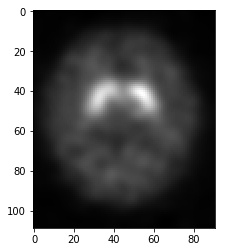

In [15]:
plt.imshow(image_array[47], cmap = plt.gray())

In [29]:
#Stack up to made RGB, so we can use pretrain model
image_array = np.stack([image_array_40, image_array_40, image_array_40], axis=3)

In [30]:
image_array.shape

(1233, 109, 91, 3)

In [31]:
#Check matched data-result by Image ID number
lstFilesDCM[0:5]

['./PPMI 3/4025/Reconstructed_DaTSCAN/2014-08-05_12_59_07.0/S234194/PPMI_4025_NM_Reconstructed_DaTSCAN_Br_20141021160932287_1_S234194_I449038.dcm',
 './PPMI 8/3454/Reconstructed_DaTSCAN/2012-02-01_14_50_57.0/S146378/PPMI_3454_NM_Reconstructed_DaTSCAN_Br_20130124100840257_1_S146378_I355949.dcm',
 './PPMI 3/3332/Reconstructed_DaTSCAN/2013-03-27_12_43_11.0/S199541/PPMI_3332_NM_Reconstructed_DaTSCAN_Br_20130909134903068_1_S199541_I388500.dcm',
 './PPMI 3.5/3175/Reconstructed_DaTSCAN/2012-04-13_14_58_17.0/S148765/PPMI_3175_NM_Reconstructed_DaTSCAN_Br_20121025082646148_1_S148765_I342180.dcm',
 './PPMI 3/3603/Reconstructed_DaTSCAN/2012-10-16_16_10_03.0/S175609/PPMI_3603_NM_Reconstructed_DaTSCAN_Br_20140402100627158_1_S175609_I418495.dcm']

In [32]:
df[0:5]

,Group,Filenames,TOTAL
Image Data ID,,,
449038,PD,./PPMI 3/4025/Reconstructed_DaTSCAN/2014-08-05...,19.0
355949,PD,./PPMI 8/3454/Reconstructed_DaTSCAN/2012-02-01...,18.0
388500,PD,./PPMI 3/3332/Reconstructed_DaTSCAN/2013-03-27...,15.0
342180,PD,./PPMI 3.5/3175/Reconstructed_DaTSCAN/2012-04-...,17.0
418495,PD,./PPMI 3/3603/Reconstructed_DaTSCAN/2012-10-16...,22.0


In [25]:
y = np.asarray(pd.factorize(df['Group']))[0]
print(y)

[0 0 0 ... 0 0 0]


In [27]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1255, 109, 91, 3) (314, 109, 91, 3) (1255,) (314,)


### Model Resnet34

In [36]:
arch=resnet34
bs=64
sz=101
#tfms = tfms_from_model(resnet50, sz, aug_tfms=transforms_side_on)
tfms = tfms_from_model(arch, sz)
data = ImageClassifierData.from_arrays('.', trn=(X_train,y_train), val=(X_val,y_val), tfms=tfms)


In [32]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
#lrf=learn.lr_find()

In [33]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.232202   258.250391 0.678344  



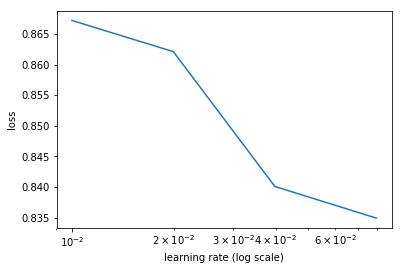

In [34]:
learn.sched.plot()

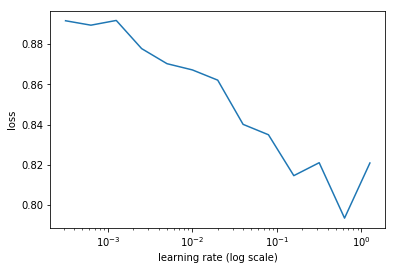

In [35]:
learn.sched.plot(n_skip=5, n_skip_end=1)

In [37]:
learn.fit(0.01, 10)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      0.675232   0.411075   0.843949  
    1      0.545698   0.436284   0.866242                 
    2      0.507289   0.410977   0.866242                  
    3      0.482792   0.400065   0.859873                 
    4      0.46486    0.422664   0.866242                  
    5      0.455061   0.444061   0.866242                 
    6      0.442712   0.391347   0.866242                 
    7      0.440309   0.403612   0.866242                  
    8      0.433223   0.430841   0.863057                  
    9      0.425872   0.426907   0.866242                 



[array([0.42691]), 0.8662420355590286]

In [38]:
learn.precompute=False

In [39]:
learn.fit(1e-3, 10, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.366212   0.309396   0.866242  
    1      0.31155    0.216322   0.917197                  
    2      0.278682   0.185889   0.923567                  
    3      0.257657   0.176137   0.929936                  
    4      0.237892   0.166355   0.93949                   
    5      0.224104   0.161333   0.936306                  
    6      0.214322   0.157478   0.936306                  
    7      0.20476    0.152122   0.936306                  
    8      0.200316   0.151265   0.936306                  
    9      0.190284   0.14947    0.936306                  



[array([0.14947]), 0.936305729446897]

In [40]:
lr = 1e-3
lrs = np.array([lr/9,lr/3,lr])

In [41]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.286302   92.396566  0.764331  



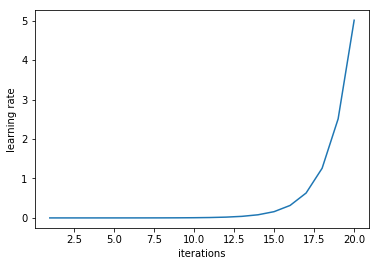

In [42]:
learn.sched.plot_lr()

In [43]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.410081   0.482975   0.866242  
    1      0.335118   0.384524   0.866242                  
    2      0.281944   0.373625   0.866242                  
    3      0.240835   0.344006   0.866242                  
    4      0.209092   0.292658   0.872611                  
    5      0.185665   0.222436   0.926752                  
    6      0.165761   0.175088   0.94586                   



[array([0.17509]), 0.9458598729911124]

In [44]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.12614    0.145199   0.952229  
    1      0.127887   0.142181   0.968153                  
    2      0.12926    0.143096   0.958599                  
    3      0.12263    0.131674   0.964968                  
    4      0.115586   0.123161   0.964968                  
    5      0.109386   0.119652   0.964968                  
    6      0.106598   0.120993   0.961783                  



[array([0.12099]), 0.9617834398700933]

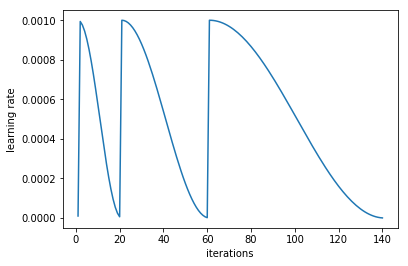

In [45]:
learn.sched.plot_lr()

In [349]:
learn.save(f'{sz}')

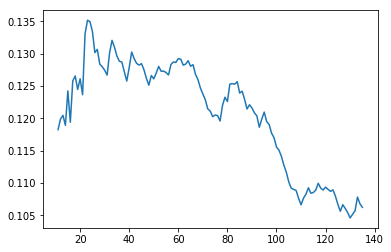

In [46]:
learn.sched.plot_loss()

In [47]:
learn.ps=0.7

In [48]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.088312   0.117896   0.964968  
    1      0.0886     0.115276   0.968153                   
    2      0.089339   0.111792   0.968153                   
    3      0.090407   0.111043   0.968153                   
    4      0.087693   0.102618   0.964968                   
    5      0.081925   0.101717   0.961783                   
    6      0.078944   0.100993   0.968153                   



[array([0.10099]), 0.9681528666216856]

In [49]:
learn.fit(1e-3, 10, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.073137   0.118148   0.955414  
    1      0.081865   0.114105   0.952229                   
    2      0.082702   0.086384   0.974522                   
    3      0.0769     0.084488   0.974522                   
    4      0.066384   0.083698   0.977707                   
    5      0.060689   0.09683    0.968153                   
    6      0.054279   0.080682   0.971338                   
    7      0.049215   0.088238   0.964968                   
    8      0.04316    0.091428   0.974522                   
    9      0.041726   0.097063   0.974522                   



[array([0.09706]), 0.9745222895768038]

In [50]:
learn.save('model_resnet34')

In [51]:
learn.load('model_resnet34')

## Model Resnext50

In [168]:
arch=resnext50
bs=64
sz=101
#tfms = tfms_from_model(resnet50, sz, aug_tfms=transforms_side_on)
tfms = tfms_from_model(arch, sz)
data = ImageClassifierData.from_arrays('.', trn=(X_train,y_train), val=(X_val,y_val), tfms=tfms)


In [169]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.8)

In [131]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.612871   315.100291 0.719745  


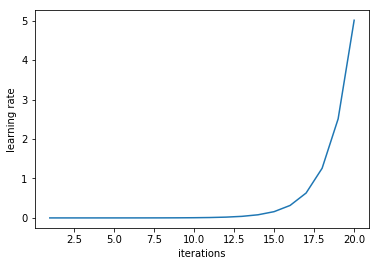

In [132]:
learn.sched.plot_lr()

In [170]:
learn.fit(0.001, 110)

HBox(children=(IntProgress(value=0, description='Epoch', max=110), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      0.996883   0.545872   0.764331  
    1      0.846591   0.385263   0.872611                 
    2      0.691688   0.374464   0.904459                  
    3      0.595813   0.467287   0.942675                 
 35%|███▌      | 7/20 [00:00<00:00, 30.10it/s, loss=0.565]
    4      0.520013   0.787732   0.94586                  
  0%|          | 0/20 [00:00<?, ?it/s]

Exception in thread Thread-1302:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



    5      0.457862   1.079143   0.94586                  
    6      0.402271   1.058783   0.952229                 
    7      0.367137   1.121107   0.964968                 
    8      0.327654   1.098253   0.971338                 
    9      0.296966   1.10328    0.971338                 
    10     0.273403   1.084208   0.971338                  
    11     0.258858   1.053484   0.974522                 
    12     0.240319   1.061591   0.974522                 
    13     0.229868   1.037486   0.974522                 
    14     0.219146   1.02549    0.974522                 
    15     0.217179   1.016867   0.971338                  
    16     0.208838   1.005147   0.974522                  
    17     0.203782   0.998678   0.971338                 
    18     0.200304   0.940842   0.974522                  
    19     0.195623   0.842854   0.974522                 
    20     0.187353   0.85164    0.971338                 
    21     0.181953   0.872437   0.964968           

[array([0.47249]), 0.974522293373278]

In [171]:
learn.precompute=False

In [172]:
learn.fit(1e-3, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.14844    0.062372   0.974522  
    1      0.156293   0.062145   0.977707                  
    2      0.154273   0.061564   0.971338                  



[array([0.06156]), 0.971337576580655]

In [173]:
lr = 1e-3
lrs = np.array([lr/9,lr/3,lr])

In [175]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.147148   0.103736   0.961783  
    1      0.139395   0.093051   0.961783                  
    2      0.132669   0.090068   0.968153                  
    3      0.124439   0.086171   0.974522                  
    4      0.116232   0.091649   0.971338                  
    5      0.111411   0.095825   0.961783                  
    6      0.105981   0.082591   0.961783                  
    7      0.099385   0.076288   0.964968                   
    8      0.094158   0.070263   0.980892                   
    9      0.088376   0.078924   0.971338                   
    10     0.082107   0.079216   0.974522                   
    11     0.080698   0.077276   0.971338                   
    12     0.073071   0.077751   0.974522                   



[array([0.07775]), 0.9745222971697521]

In [176]:
lr = 1e-4

In [177]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.062668   0.082508   0.971338  
    1      0.069206   0.079558   0.977707                   
    2      0.067616   0.077303   0.977707                   
    3      0.065413   0.077433   0.974522                   
    4      0.066186   0.081069   0.971338                   
    5      0.065911   0.089644   0.964968                   
    6      0.062134   0.075981   0.974522                   
    7      0.055605   0.079385   0.974522                   
    8      0.054678   0.079014   0.977707                   
    9      0.053047   0.074768   0.974522                   
    10     0.049628   0.074695   0.977707                   
    11     0.046489   0.074591   0.977707                   
    12     0.047102   0.07488    0.977707                   



[array([0.07488]), 0.9777070029525999]

In [178]:
learn.save('model_resnext50')

In [179]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

accuracy(probs,y)

NameError: name 'probs' is not defined